In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [40]:
df=pd.read_csv("C:\\Users\\Ramyasree K\\OneDrive\\Desktop\\prodigy infotech projects info\\train.csv")

In [42]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
#data cleaning
df.drop(["PassengerId","Name","Ticket","Cabin","Embarked"],axis=1,inplace=True)

In [46]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [48]:
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [50]:
le =LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])


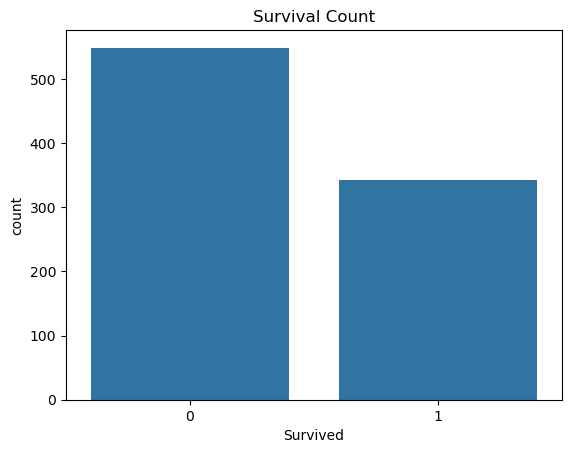

In [52]:
#EXPLORATORY DATA ANALYSIS
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.show()

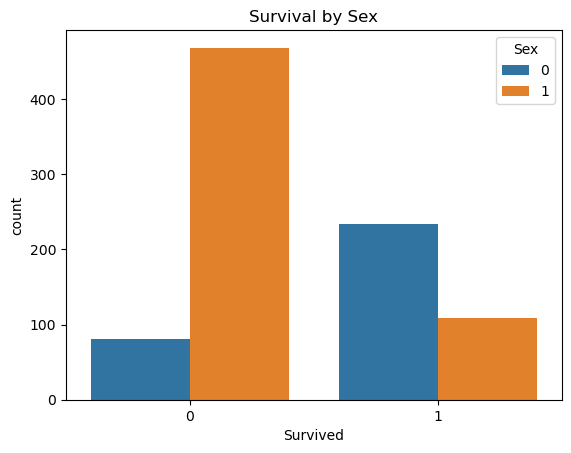

In [54]:
sns.countplot(x='Survived', hue='Sex', data=df)
plt.title('Survival by Sex')
plt.show()

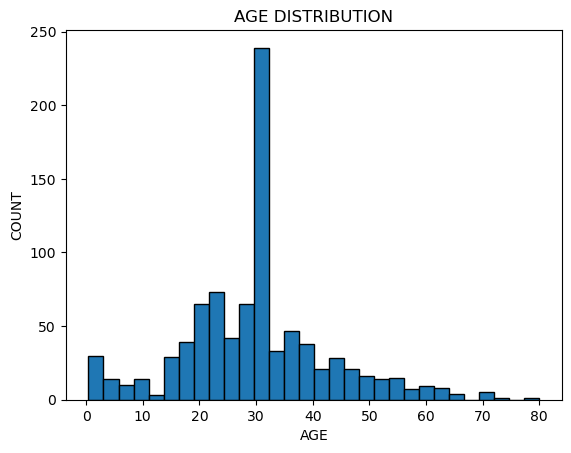

In [58]:
plt.hist(df['Age'], bins=30, edgecolor='k')
plt.title('AGE DISTRIBUTION')
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show()

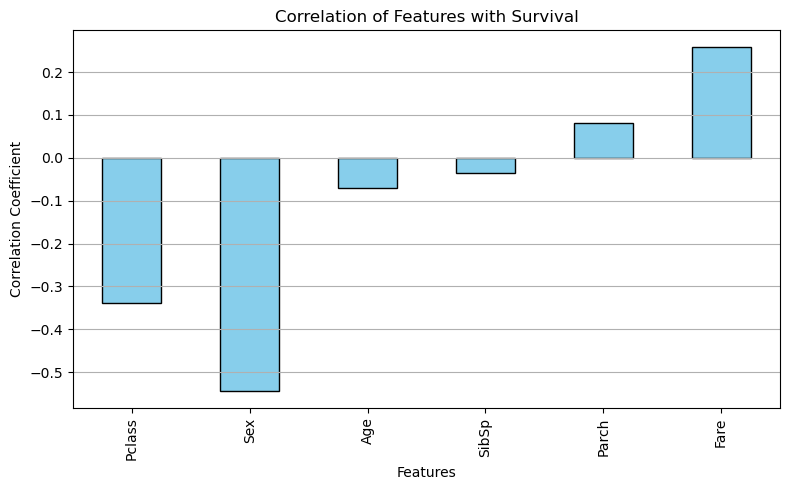

In [70]:
correlations = df.corr()['Survived'].drop('Survived')  # Drop self-correlation
plt.figure(figsize=(8, 5))
correlations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Correlation of Features with Survival')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [62]:
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [68]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7932960893854749
